In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [2]:
with open('VDR_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    vdr_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('cdd2021/data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [09:46:12] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:46:12] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [09:46:12] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [09:46:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:46:13] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [09:46:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:46:13] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [09:46:13] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [09:46:13] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [09:46:13] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [09:46:13] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

RDKit ERROR: [09:46:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [09:46:13] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [09:46:13] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [09:46:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [09:46:13] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [09:46:13] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [09:46:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [09:46:13] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [09:46:13] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [09:46:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [09:46:13] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [09:46:14] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [09:46:15] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [09:46:15] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [09:46:15] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [09:46:15] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [09:46:15] ERROR: Could not sanitize molecule ending on line 1151592


# structural key

In [3]:
ethanol_pattern = Chem.MolFromSmarts('CCO')
propanol_pattern = Chem.MolFromSmarts('CCCO')
cooh_pattern = Chem.MolFromSmarts('C(=O)[O;h1]')
salicylic_acid_pattern = Chem.MolFromSmarts('c1ccc(c(c1)C(=O)O)O')

In [27]:
custom_key = [ethanol_pattern, propanol_pattern, cooh_pattern, salicylic_acid_pattern]
vdr_ligands_keys = [[m.HasSubstructMatch(substruct) for substruct in custom_key] for m in vdr_ligands]
len(vdr_ligands_keys), vdr_ligands_keys

(643,
 [[True, True, False, False],
  [True, True, False, False],
  [True, True, True, False],
  [True, True, False, False],
  [True, True, False, False],
  [True, True, False, False],
  [True, True, True, False],
  [True, True, True, False],
  [False, False, False, False],
  [True, True, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [False, False, False, False],
  [True, True, False, False],
  [True, True, False, False],
  [True, True, True, False],
  [True, True, False, False],
  [True, True, False, False],
  [True, True, False, False],
  [False, False, False, False],
  [True, True, True, False],
  [True, True, False, False],
  [True, True, False, False],
  [True, True, False, False],
  [True, True, True, False],
  [False, False, False, False],
  [True, True, False, False],
  [True, True, False, False],
  [True, True, True, False],
  [True, True, True, False],
  [True, True, False, False],
  [True, True, False, False]

In [35]:
#kolikrat obsahuje jednostlive structural keys ligandy VDR
count = [0,0,0,0]
for x in vdr_ligands_keys:
    for i in range(4):
        if x[i] == True:
            count[i] += 1
count

[352, 333, 74, 12]

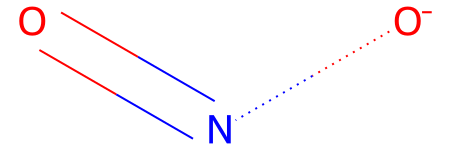

In [79]:
no = Chem.MolFromSmarts('[O-]N=O')
no


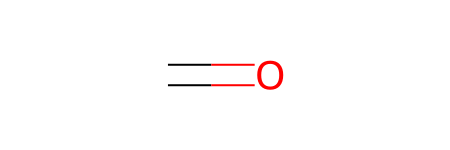

In [80]:
o = Chem.MolFromSmarts('[CX3]=[OX1]')
o

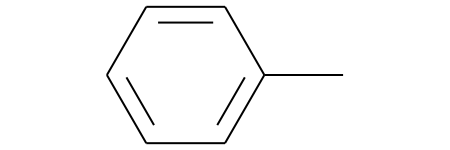

In [81]:
toluene = Chem.MolFromSmiles('Cc1ccccc1')
toluene

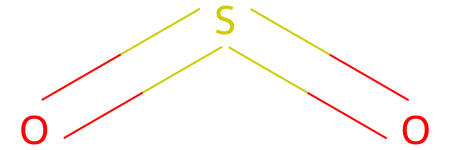

In [82]:
so = Chem.MolFromSmarts('O=S=O')
so

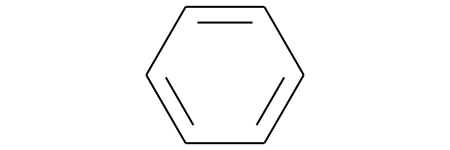

In [83]:
benzen = Chem.MolFromSmarts('C1=C-C=C-C=C-1')
benzen


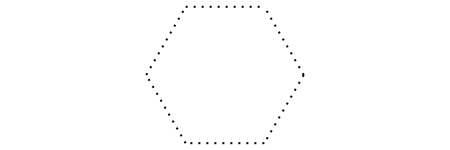

In [84]:
m = Chem.MolFromSmarts('c1ccccc1')
m

In [85]:
custom_key = [no,o,toluene,so,benzen,m]
vdrr_ligands_keys = [[m.HasSubstructMatch(substruct) for substruct in custom_key] for m in vdr_ligands]
len(vdrr_ligands_keys), vdrr_ligands_keys

(643,
 [[False, True, False, False, False, False],
  [False, True, False, False, False, False],
  [False, True, False, False, False, False],
  [False, False, False, False, False, False],
  [False, False, False, False, False, False],
  [False, False, False, False, False, False],
  [False, True, False, False, False, False],
  [False, True, False, False, False, False],
  [False, True, True, False, False, True],
  [False, False, False, False, False, False],
  [False, False, False, False, False, True],
  [False, False, False, False, False, True],
  [False, False, True, False, False, True],
  [False, False, True, False, False, True],
  [False, False, False, False, False, False],
  [False, True, True, False, False, True],
  [False, True, False, False, False, False],
  [False, True, False, False, False, False],
  [False, True, False, False, False, False],
  [False, True, False, False, False, False],
  [False, True, True, False, False, True],
  [False, True, False, False, False, False],
  [Fals

In [86]:
count = [0,0,0,0,0,0]
for x in vdrr_ligands_keys:
    for i in range(6):
        if x[i] == True:
            count[i] += 1
count

[99, 426, 378, 122, 0, 410]

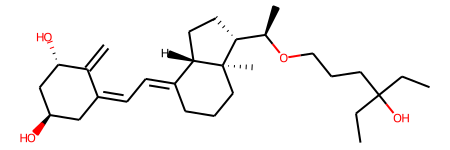

In [87]:

vdr_ligands[9]

# MACCS key

In [89]:
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

In [6]:
vdr_maccs = [MACCSkeys.GenMACCSKeys(m) for m in vdr_ligands]
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugs]
vdr_maccs[0]

Jak jsou jednotlive fingerprinty podobne

In [92]:
DataStructs.FingerprintSimilarity(vdr_maccs[0],vdr_maccs[1])

0.9183673469387755

In [91]:
DataStructs.FingerprintSimilarity(vdr_maccs[0],drugbank_maccs[0])

0.43373493975903615

In [94]:
DataStructs.FingerprintSimilarity(vdr_maccs[0],vdr_maccs[333])

0.21

In [7]:
#pocet bitu
vdr_maccs[0].GetNumBits()

167

In [73]:
#bity ktere jsou v ligand VDR
list(vdr_maccs[0].GetOnBits())

[34,
 50,
 53,
 57,
 66,
 74,
 76,
 82,
 83,
 89,
 90,
 91,
 96,
 99,
 101,
 104,
 105,
 108,
 109,
 112,
 115,
 116,
 118,
 123,
 127,
 128,
 129,
 131,
 132,
 137,
 139,
 140,
 141,
 143,
 145,
 146,
 147,
 149,
 150,
 152,
 153,
 154,
 155,
 157,
 159,
 160,
 163,
 164,
 165]

In [11]:
vdr_maccs[0].GetBit(34), vdr_maccs[0].GetBit(26)

(True, False)

In [71]:
vdr_maccs[5].ToBitString()

'00000000000000000000000000000000001000000000000000100100000000000010000000001000000000000101000010010100110010001011101000000001110110000001010101110110100101011001110'

In [75]:
vdr_ligands_maccs_sums = [0]*vdr_maccs[0].GetNumBits() # a list of zeros of a given length
for key in vdr_maccs:
    for onbit in key.GetOnBits():
        vdr_ligands_maccs_sums[onbit] += 1

for i in range(1,167):
    print(i,':',vdr_ligands_maccs_sums[i])

1 : 0
2 : 0
3 : 0
4 : 0
5 : 0
6 : 0
7 : 0
8 : 1
9 : 0
10 : 0
11 : 1
12 : 0
13 : 4
14 : 0
15 : 0
16 : 0
17 : 21
18 : 0
19 : 27
20 : 0
21 : 0
22 : 3
23 : 1
24 : 105
25 : 1
26 : 1
27 : 2
28 : 5
29 : 0
30 : 0
31 : 0
32 : 7
33 : 9
34 : 231
35 : 0
36 : 16
37 : 0
38 : 16
39 : 9
40 : 9
41 : 2
42 : 49
43 : 3
44 : 0
45 : 0
46 : 2
47 : 20
48 : 9
49 : 109
50 : 253
51 : 118
52 : 1
53 : 378
54 : 35
55 : 122
56 : 99
57 : 180
58 : 122
59 : 114
60 : 122
61 : 122
62 : 103
63 : 99
64 : 114
65 : 217
66 : 338
67 : 123
68 : 2
69 : 13
70 : 99
71 : 105
72 : 172
73 : 122
74 : 143
75 : 189
76 : 253
77 : 20
78 : 11
79 : 142
80 : 166
81 : 122
82 : 163
83 : 378
84 : 37
85 : 213
86 : 146
87 : 105
88 : 135
89 : 310
90 : 231
91 : 358
92 : 296
93 : 228
94 : 115
95 : 230
96 : 517
97 : 235
98 : 90
99 : 267
100 : 217
101 : 453
102 : 128
103 : 75
104 : 404
105 : 454
106 : 38
107 : 120
108 : 335
109 : 171
110 : 297
111 : 214
112 : 455
113 : 158
114 : 135
115 : 374
116 : 422
117 : 305
118 : 438
119 : 110
120 : 180
121 : 373

V mem data setu: Nejvic vyckytuje bit 165:('[R]',0), # Ring

In [76]:
drugbank_maccs_sums = [0]*drugbank_maccs[0].GetNumBits() # a list of zeros of a given length
for key in drugbank_maccs:
    for onbit in key.GetOnBits():
        drugbank_maccs_sums[onbit] += 1
for i in range(1,167):
    print(i,':',drugbank_maccs_sums[i])

1 : 0
2 : 0
3 : 30
4 : 0
5 : 1
6 : 11
7 : 24
8 : 99
9 : 46
10 : 22
11 : 117
12 : 30
13 : 60
14 : 33
15 : 11
16 : 52
17 : 77
18 : 68
19 : 282
20 : 7
21 : 21
22 : 181
23 : 212
24 : 435
25 : 564
26 : 224
27 : 96
28 : 149
29 : 726
30 : 126
31 : 21
32 : 431
33 : 481
34 : 153
35 : 44
36 : 625
37 : 521
38 : 1312
39 : 153
40 : 167
41 : 166
42 : 698
43 : 1198
44 : 266
45 : 246
46 : 194
47 : 455
48 : 869
49 : 713
50 : 646
51 : 601
52 : 553
53 : 1895
54 : 2246
55 : 663
56 : 178
57 : 1633
58 : 669
59 : 604
60 : 685
61 : 695
62 : 1753
63 : 207
64 : 624
65 : 2507
66 : 1118
67 : 782
68 : 133
69 : 1551
70 : 295
71 : 526
72 : 2196
73 : 755
74 : 1184
75 : 2092
76 : 797
77 : 2245
78 : 703
79 : 2263
80 : 2296
81 : 1228
82 : 2080
83 : 2781
84 : 2109
85 : 2498
86 : 1685
87 : 1310
88 : 1596
89 : 2474
90 : 3533
91 : 3342
92 : 2825
93 : 1650
94 : 1481
95 : 3191
96 : 3098
97 : 2783
98 : 3056
99 : 1145
100 : 2845
101 : 2775
102 : 1934
103 : 786
104 : 3210
105 : 2939
106 : 2665
107 : 1534
108 : 1732
109 : 2372
11

v DrugBank: nejcastejsi je 164:('[#8]',0), # O

Pro porovnani rozdelime velikosti data setu, budeme mit cisla mezi 0-1

In [15]:
vdr_ligands_maccs_scaled = [x/len(vdr_maccs) for x in vdr_ligands_maccs_sums]
vdr_ligands_maccs_scaled

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0015552099533437014,
 0.0,
 0.0,
 0.0015552099533437014,
 0.0,
 0.006220839813374806,
 0.0,
 0.0,
 0.0,
 0.03265940902021773,
 0.0,
 0.041990668740279936,
 0.0,
 0.0,
 0.004665629860031105,
 0.0015552099533437014,
 0.16329704510108864,
 0.0015552099533437014,
 0.0015552099533437014,
 0.003110419906687403,
 0.007776049766718507,
 0.0,
 0.0,
 0.0,
 0.01088646967340591,
 0.013996889580093312,
 0.359253499222395,
 0.0,
 0.024883359253499222,
 0.0,
 0.024883359253499222,
 0.013996889580093312,
 0.013996889580093312,
 0.003110419906687403,
 0.07620528771384137,
 0.004665629860031105,
 0.0,
 0.0,
 0.003110419906687403,
 0.03110419906687403,
 0.013996889580093312,
 0.16951788491446346,
 0.39346811819595645,
 0.18351477449455678,
 0.0015552099533437014,
 0.5878693623639192,
 0.05443234836702955,
 0.18973561430793157,
 0.15396578538102643,
 0.27993779160186627,
 0.18973561430793157,
 0.17729393468118196,
 0.18973561430793157,
 0.1897356143079315

In [16]:
drugbank_maccs_scaled = [x/len(drugbank_maccs) for x in drugbank_maccs_sums]
drugbank_maccs_scaled

[0.0,
 0.0,
 0.0,
 0.004217629692113032,
 0.0,
 0.00014058765640376775,
 0.0015464642204414453,
 0.003374103753690426,
 0.013918177983973008,
 0.006467032194573317,
 0.0030929284408828905,
 0.016448755799240825,
 0.004217629692113032,
 0.008435259384226065,
 0.004639392661324336,
 0.0015464642204414453,
 0.007310558132995923,
 0.010825249543090117,
 0.009559960635456208,
 0.0396457191058625,
 0.0009841135948263741,
 0.0029523407844791226,
 0.025446365809081963,
 0.029804583157598763,
 0.06115563053563897,
 0.079291438211725,
 0.03149163503444397,
 0.013496415014761703,
 0.020947560804161394,
 0.10206663854913539,
 0.017714044706874738,
 0.0029523407844791226,
 0.0605932799100239,
 0.0676226627302123,
 0.021509911429776464,
 0.006185856881765781,
 0.08786728525235485,
 0.07324616898636299,
 0.1844510052017433,
 0.021509911429776464,
 0.023478138619429215,
 0.023337550963025446,
 0.0981301841698299,
 0.16842401237171375,
 0.03739631660340222,
 0.03458456347532687,
 0.027274005342330942,


In [78]:
#pro porovnani odecteme jeden od druhyho
vdr_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(vdr_ligands_maccs_scaled, drugbank_maccs_scaled))]
vdr_drugbank_differences

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, -0.004217629692113032),
 (4, 0.0),
 (5, -0.00014058765640376775),
 (6, -0.0015464642204414453),
 (7, -0.003374103753690426),
 (8, -0.012362968030629307),
 (9, -0.006467032194573317),
 (10, -0.0030929284408828905),
 (11, -0.014893545845897124),
 (12, -0.004217629692113032),
 (13, -0.002214419570851259),
 (14, -0.004639392661324336),
 (15, -0.0015464642204414453),
 (16, -0.007310558132995923),
 (17, 0.021834159477127614),
 (18, -0.009559960635456208),
 (19, 0.002344949634417434),
 (20, -0.0009841135948263741),
 (21, -0.0029523407844791226),
 (22, -0.02078073594905086),
 (23, -0.028249373204255062),
 (24, 0.10214141456544967),
 (25, -0.0777362282583813),
 (26, -0.02993642508110027),
 (27, -0.010385995108074302),
 (28, -0.013171511037442886),
 (29, -0.10206663854913539),
 (30, -0.017714044706874738),
 (31, -0.0029523407844791226),
 (32, -0.04970681023661799),
 (33, -0.05362577315011898),
 (34, 0.33774358779261854),
 (35, -0.006185856881765781),
 (36, -

In [18]:
#sort bits
vdr_drugbank_differences.sort(key=lambda x: x[1])
vdr_drugbank_differences

[(106, -0.3155681260889804),
 (98, -0.2896669821689811),
 (77, -0.2845150895595846),
 (54, -0.2613275279158328),
 (84, -0.2389565990818292),
 (151, -0.21988084376207317),
 (136, -0.2147101478269368),
 (158, -0.20626526813651824),
 (69, -0.19783372568877566),
 (120, -0.1731762249874772),
 (43, -0.16375838251168265),
 (38, -0.15956764594824407),
 (148, -0.14911212226359688),
 (142, -0.14443031279769653),
 (124, -0.14409010378779877),
 (161, -0.14223928806235875),
 (111, -0.14194958565997157),
 (90, -0.1374426908521164),
 (48, -0.10817378383478085),
 (29, -0.10206663854913539),
 (79, -0.09731005306692084),
 (95, -0.09091692231537157),
 (162, -0.08820924340883307),
 (62, -0.08626353648140361),
 (153, -0.0844638832934419),
 (156, -0.08234894643435375),
 (78, -0.08172581296506802),
 (25, -0.0777362282583813),
 (113, -0.07650373584913087),
 (52, -0.07618976403793987),
 (37, -0.07324616898636299),
 (102, -0.07282965345689307),
 (138, -0.0704772699495087),
 (109, -0.06753301896796415),
 (122, -

MACCS bity které nejmíň rozšiřené v sádě ligandu VDR ve srovnání s DrugBank: 

    1. 106 # QA(Q)Q    
    2. 98  # QAAAAA@1    
    3. 77  # NAN    
    4. 54  # QHAAQH    
    5. 84  # NH2 ....
    
Nejběžnější bity MACCS v sádě VDR ve srovnání s DrugBank:

    1. 149 # CH3 > 1
    2. 150 # A!A$A!A
    3. 160 # CH3
    4. 141 # CH3 > 2
    5. 116 # CH3AACH2A
    
Pro rozšifrování:

    A : Any valid periodic table element symbol
    Q : Hetro atoms; any non-C or non-H atom
    X : Others; other than H, C, N, O, Si, P, S, F, Cl, Br, I
    Z is neither defined nor used
    
    $ : Ring bond; $ before a bond type specifies ring bond
    ! : Chain or non-ring bond; ! before a bond type specifies chain bond

    @ : A ring linkage and the number following it specifies the atoms position in the line, thus @1 means     linked back to the first atom in the list.

Co je lepši na používání MACCS nebo Morganův fingeprint?

Nezagrňuje Morganův fingeprint víc informaci když má 1024 bitů?

Nevím co přesně je tohle za struktura # A!A$A!A